In [2]:
import numpy as np
import pandas as pd
import clean as c
import clusters as clu
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [3]:
s2004 = pd.read_csv('data/2004.csv')
s2005 = pd.read_csv('data/2005.csv')
s2006 = pd.read_csv('data/2006.csv')
s2007 = pd.read_csv('data/2007.csv')
s2008 = pd.read_csv('data/2008.csv')
s2009 = pd.read_csv('data/2009.csv')
s2010 = pd.read_csv('data/2010.csv')
s2011 = pd.read_csv('data/2011.csv')
s2012 = pd.read_csv('data/2012.csv')
s2013 = pd.read_csv('data/2013.csv')
s2014 = pd.read_csv('data/2014.csv')
s2015 = pd.read_csv('data/2015.csv')
s2016 = pd.read_csv('data/2016.csv')
s2017 = pd.read_csv('data/2017.csv')
s2018 = pd.read_csv('data/2018.csv')

In [3]:
s2004 = c.all_clean_pels(s2004)
s2005 = c.all_clean_pels(s2005)
s2006 = c.all_clean_pels(s2006)
s2007 = c.all_clean_pels(s2007)
s2008 = c.all_clean_pels(s2008)
s2009 = c.all_clean_pels(s2009)
s2010 = c.all_clean_pels(s2010)
s2011 = c.all_clean_pels(s2011)
s2012 = c.all_clean_pels(s2012)
s2013 = c.all_clean_pels(s2013)
s2014 = c.all_clean(s2014)
s2015 = c.all_clean(s2015)
s2016 = c.all_clean(s2016)
s2017 = c.all_clean(s2017)
s2018 = c.all_clean(s2018)

In [31]:
game_avgs2004 = c.get_team_avgs(s2004)
game_avgs2005 = c.get_team_avgs(s2005)
game_avgs2006 = c.get_team_avgs(s2006)
game_avgs2007 = c.get_team_avgs(s2007)
game_avgs2008 = c.get_team_avgs(s2008)
game_avgs2009 = c.get_team_avgs(s2009)
game_avgs2010 = c.get_team_avgs(s2010)
game_avgs2011 = c.get_team_avgs(s2011)
game_avgs2012 = c.get_team_avgs_2012(s2012)
game_avgs2013 = c.get_team_avgs(s2013)
game_avgs2014 = c.get_team_avgs(s2014)
game_avgs2015 = c.get_team_avgs(s2015)
game_avgs2016 = c.get_team_avgs(s2016)
game_avgs2017 = c.get_team_avgs(s2017)
game_avgs2018 = c.get_team_avgs(s2018)


In [33]:
game_avgs2011

,AST,BLK,DREB,OREB,PF,REB,STL,TO,FT_made,FT_attempts,3PT_made,3PT_attempts,FG_made,FG_attempts,AVG_score,Possessions
team,,,,,,,,,,,,,,,,
76ers,22.695122,4.329268,31.439024,10.365854,19.414634,41.804878,7.573171,12.207317,17.390244,22.573171,5.402439,15.219512,38.109756,82.634146,99.012195,94.841463
Bucks,18.841463,4.865854,30.243902,10.512195,20.512195,40.756098,7.524390,12.512195,17.353659,22.939024,5.890244,17.243902,34.317073,79.804878,91.878049,92.317073
Bulls,22.280488,5.707317,32.365854,11.792683,19.987805,44.158537,7.219512,13.463415,18.195122,24.487805,6.231707,17.256098,37.097561,80.329268,98.621951,93.792683
Cavaliers,20.975610,4.158537,29.865854,10.439024,20.097561,40.304878,6.634146,13.719512,18.853659,25.304878,6.207317,18.158537,35.195122,81.060976,95.451220,94.780488
Celtics,23.426829,4.195122,31.000000,7.792683,20.463415,38.792683,8.243902,13.597561,17.792683,23.109756,4.975610,13.646341,36.865854,75.841463,96.500000,89.439024
Clippers,22.109756,4.902439,30.500000,11.646341,21.134146,42.146341,7.134146,15.524390,18.853659,26.670732,6.256098,18.524390,36.768293,80.414634,98.646341,95.939024
Grizzlies,20.621951,5.378049,29.158537,11.829268,20.792683,40.987805,9.402439,13.426829,18.121951,24.158537,3.768293,11.292683,39.024390,82.939024,99.939024,96.365854
Hawks,21.975610,4.158537,30.000000,9.292683,18.951220,39.292683,6.060976,12.780488,16.414634,21.073171,6.121951,17.402439,36.231707,78.402439,95.000000,91.182927
Heat,19.987805,5.243902,32.512195,9.634146,20.414634,42.146341,6.634146,13.219512,21.463415,27.902439,6.670732,18.036585,36.963415,76.841463,102.060976,90.060976


In [34]:
#2004 doesnt have all 30 teams
teams = game_avgs2005.index


In [35]:
s_comb=game_avgs2017
s_comb=s_comb.append(game_avgs2016).append(game_avgs2015)

In [36]:
s_comb=s_comb.groupby('team').mean()

In [37]:
s_comb

,AST,BLK,DREB,OREB,PF,REB,STL,TO,FT_made,FT_attempts,3PT_made,3PT_attempts,FG_made,FG_attempts,AVG_score,Possessions
team,,,,,,,,,,,,,,,,
76ers,21.939024,5.686992,31.894309,10.414634,21.752033,42.308943,8.784553,16.158537,16.247967,22.800813,9.296748,27.873984,35.865854,83.955285,97.276423,100.113821
Bucks,23.621951,5.345528,31.390244,9.983740,21.012195,41.373984,8.646341,14.654472,16.735772,22.097561,6.930894,19.203252,38.252033,82.016260,100.170732,96.670732
Bulls,22.365854,5.443089,34.463415,11.646341,18.272358,46.109756,6.715447,13.162602,18.073171,22.906504,7.800813,21.987805,37.947154,85.804878,101.768293,98.967480
Cavaliers,22.491870,4.008130,33.378049,10.365854,18.951220,43.743902,6.882114,13.231707,17.142276,22.886179,11.272358,30.325203,38.760163,83.699187,105.934959,96.930894
Celtics,24.630081,3.991870,32.991870,10.585366,21.219512,43.577236,8.304878,13.126016,17.569106,22.398374,9.601626,28.069106,38.930894,87.426829,105.032520,100.552846
Clippers,23.382114,4.947154,33.443089,9.117886,20.817073,42.560976,7.971545,12.215447,18.471545,25.800813,10.020325,26.979675,39.069106,82.963415,106.630081,95.178862
Grizzlies,21.211382,4.231707,31.512195,10.804878,21.097561,42.317073,8.443089,12.699187,18.426829,23.621951,6.886179,20.065041,36.991870,83.235772,99.296748,95.934959
Hawks,24.995935,5.134146,33.235772,9.089431,18.365854,42.325203,8.792683,14.402439,16.727642,22.000000,9.601626,26.890244,38.260163,83.495935,102.849593,97.898374
Heat,20.638211,5.589431,32.426829,9.861789,19.585366,42.288618,7.247967,13.239837,16.634146,22.752033,7.569106,21.756098,37.548780,81.560976,99.300813,94.800813


In [38]:
s_comb=normalize(s_comb)

In [39]:
pd.DataFrame(s_comb,index=teams)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
team,,,,,,,,,,,,,,,,
76ers,0.119495,0.030975,0.173718,0.056725,0.118476,0.230443,0.047847,0.088010,0.088497,0.124188,0.050636,0.151820,0.195349,0.457276,0.529832,0.545287
Bucks,0.130294,0.029485,0.173142,0.055068,0.115899,0.228210,0.047691,0.080831,0.092311,0.121885,0.038229,0.105921,0.210990,0.452384,0.552520,0.533215
Bulls,0.119754,0.029144,0.184529,0.062358,0.097836,0.246887,0.035957,0.070477,0.096770,0.122649,0.041768,0.117730,0.203182,0.459428,0.544901,0.529905
Cavaliers,0.119833,0.021355,0.177833,0.055228,0.100969,0.233061,0.036667,0.070497,0.091331,0.121934,0.060057,0.161568,0.206508,0.445937,0.564406,0.516433
Celtics,0.129086,0.020921,0.172911,0.055478,0.111212,0.228389,0.043526,0.068794,0.092080,0.117390,0.050322,0.147110,0.204037,0.458205,0.550476,0.526998
Clippers,0.125155,0.026480,0.179007,0.048804,0.111425,0.227811,0.042668,0.065384,0.098870,0.138101,0.053635,0.144411,0.209121,0.444069,0.570746,0.509453
Grizzlies,0.117203,0.023382,0.174120,0.059702,0.116574,0.233823,0.046652,0.070169,0.101817,0.130523,0.038050,0.110869,0.204398,0.459919,0.548664,0.530088
Hawks,0.134713,0.027670,0.179121,0.048987,0.098981,0.228108,0.047387,0.077621,0.090152,0.118567,0.051747,0.144922,0.206200,0.449994,0.554298,0.527614
Heat,0.114940,0.031129,0.180594,0.054923,0.109076,0.235517,0.040366,0.073736,0.092640,0.126712,0.042154,0.121166,0.209119,0.454235,0.553033,0.527972


In [40]:
km = KMeans(n_clusters=5,n_init=20)

In [41]:
km.fit(s_comb)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
km.labels_

array([2, 0, 3, 1, 1, 1, 0, 1, 3, 3, 3, 0, 2, 2, 2, 1, 3, 3, 3, 3, 2, 3,
       4, 3, 2, 3, 0, 1, 1, 3], dtype=int32)

In [43]:
{i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}


{0: array([ 1,  6, 11, 26]),
 1: array([ 3,  4,  5,  7, 15, 27, 28]),
 2: array([ 0, 12, 13, 14, 20, 24]),
 3: array([ 2,  8,  9, 10, 16, 17, 18, 19, 21, 23, 25, 29]),
 4: array([22])}

In [44]:
s2015.columns

Index(['+/-', 'AST', 'BLK', 'DREB', 'Min', 'Name', 'OREB', 'PF', 'PTS', 'REB',
       'STL', 'TO', 'game_id', 'starter', 'team', 'Position', 'home_team',
       'days_after_opener', 'FT_made', 'FT_attempts', '3PT_made',
       '3PT_attempts', 'FG_made', 'FG_attempts', 'Total_PTS'],
      dtype='object')

In [141]:
comb_3,clusters =clu.create_clusters(s2015,s2016,s2017)

In [142]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [143]:
clusters.labels_

array([4, 0, 3, 2, 4, 1, 0, 4, 3, 3, 3, 0, 3, 3, 3, 4, 3, 3, 3, 3, 3, 1,
       2, 0, 3, 3, 0, 4, 2, 0], dtype=int32)

In [144]:
{i: np.where(clusters.labels_ == i)[0] for i in range(5)}


{0: array([ 1,  6, 11, 23, 26, 29]),
 1: array([ 5, 21]),
 2: array([ 3, 22, 28]),
 3: array([ 2,  8,  9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 24, 25]),
 4: array([ 0,  4,  7, 15, 27])}

In [145]:
comb_3['cluster']=clusters.labels_

In [146]:
comb_3=pd.concat((comb_3,pd.get_dummies(comb_3['cluster'],prefix='cluster')),axis=1)

In [147]:
comb_3.drop('cluster',axis=1,inplace=True)

In [148]:
comb_3

,AST,BLK,DREB,OREB,PF,REB,STL,TO,FT_made,FT_attempts,...,3PT_attempts,FG_made,FG_attempts,AVG_score,Possessions,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
team,,,,,,,,,,,,,,,,,,,,,
76ers,21.939024,5.686992,31.894309,10.414634,21.752033,42.308943,8.784553,16.158537,16.247967,22.800813,...,27.873984,35.865854,83.955285,97.276423,100.113821,0,0,0,0,1
Bucks,23.621951,5.345528,31.390244,9.983740,21.012195,41.373984,8.646341,14.654472,16.735772,22.097561,...,19.203252,38.252033,82.016260,100.170732,96.670732,1,0,0,0,0
Bulls,22.365854,5.443089,34.463415,11.646341,18.272358,46.109756,6.715447,13.162602,18.073171,22.906504,...,21.987805,37.947154,85.804878,101.768293,98.967480,0,0,0,1,0
Cavaliers,22.491870,4.008130,33.378049,10.365854,18.951220,43.743902,6.882114,13.231707,17.142276,22.886179,...,30.325203,38.760163,83.699187,105.934959,96.930894,0,0,1,0,0
Celtics,24.630081,3.991870,32.991870,10.585366,21.219512,43.577236,8.304878,13.126016,17.569106,22.398374,...,28.069106,38.930894,87.426829,105.032520,100.552846,0,0,0,0,1
Clippers,23.382114,4.947154,33.443089,9.117886,20.817073,42.560976,7.971545,12.215447,18.471545,25.800813,...,26.979675,39.069106,82.963415,106.630081,95.178862,0,1,0,0,0
Grizzlies,21.211382,4.231707,31.512195,10.804878,21.097561,42.317073,8.443089,12.699187,18.426829,23.621951,...,20.065041,36.991870,83.235772,99.296748,95.934959,1,0,0,0,0
Hawks,24.995935,5.134146,33.235772,9.089431,18.365854,42.325203,8.792683,14.402439,16.727642,22.000000,...,26.890244,38.260163,83.495935,102.849593,97.898374,0,0,0,0,1
Heat,20.638211,5.589431,32.426829,9.861789,19.585366,42.288618,7.247967,13.239837,16.634146,22.752033,...,21.756098,37.548780,81.560976,99.300813,94.800813,0,0,0,1,0


In [149]:
cluster_0=comb_3[comb_3['cluster_0']==1]

In [150]:
cluster_1=comb_3[comb_3['cluster_1']==1]

In [151]:
cluster_2=comb_3[comb_3['cluster_2']==1]

In [152]:
cluster_3=comb_3[comb_3['cluster_3']==1]

In [153]:
cluster_4=comb_3[comb_3['cluster_4']==1]

In [154]:
cluster_0_bar=pd.DataFrame(cluster_0.mean())

<Container object of 21 artists>

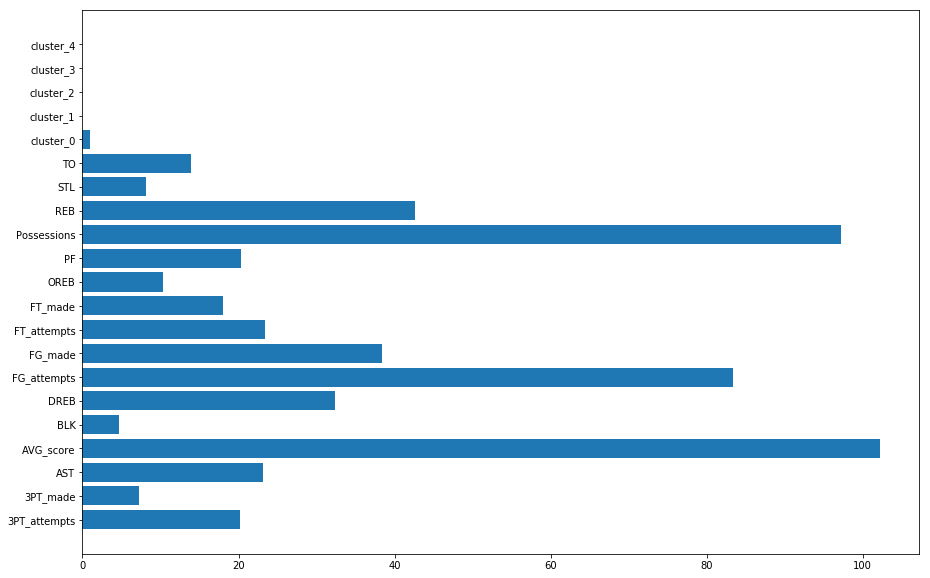

In [155]:
plt.figure(figsize=(15,10))
plt.barh(cluster_0_bar.index,cluster_0_bar[0])

In [156]:
cluster_1_bar=pd.DataFrame(cluster_1.mean())

<Container object of 21 artists>

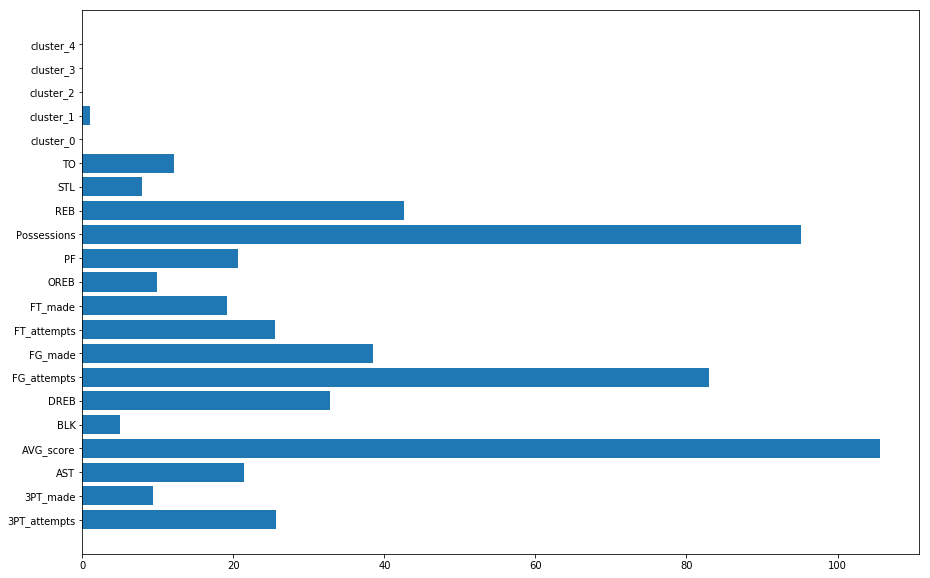

In [157]:
plt.figure(figsize=(15,10))
plt.barh(cluster_1_bar.index,cluster_1_bar[0])

In [158]:
cluster_2_bar=pd.DataFrame(cluster_2.mean())

<Container object of 21 artists>

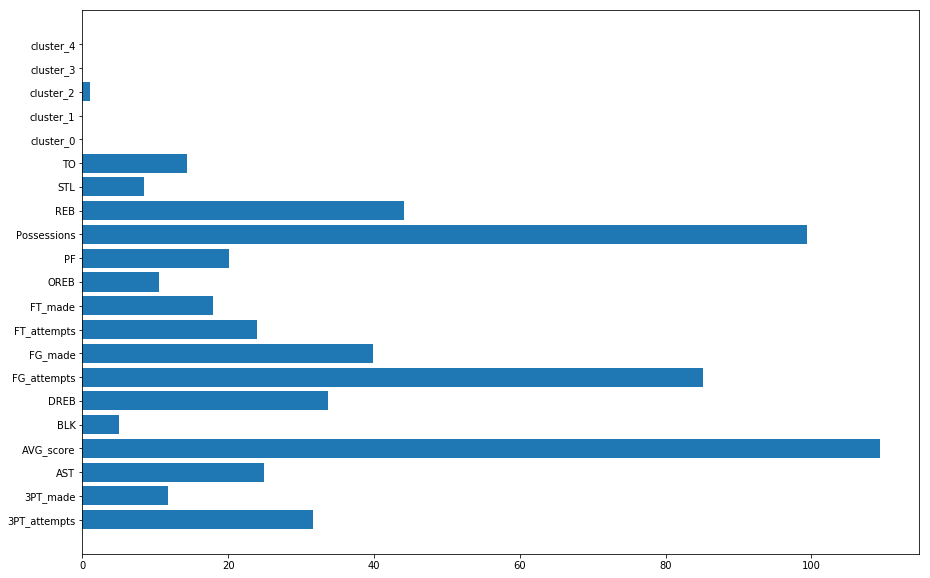

In [159]:
plt.figure(figsize=(15,10))
plt.barh(cluster_2_bar.index,cluster_2_bar[0])

In [160]:
cluster_3_bar=pd.DataFrame(cluster_3.mean())

<Container object of 21 artists>

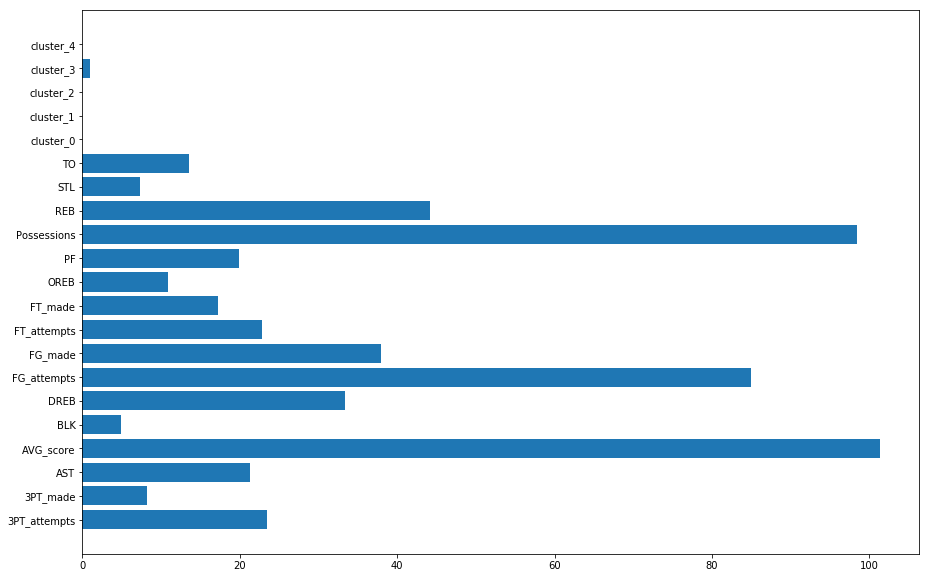

In [161]:
plt.figure(figsize=(15,10))
plt.barh(cluster_3_bar.index,cluster_3_bar[0])

In [162]:
cluster_4_bar=pd.DataFrame(cluster_4.mean())

<Container object of 21 artists>

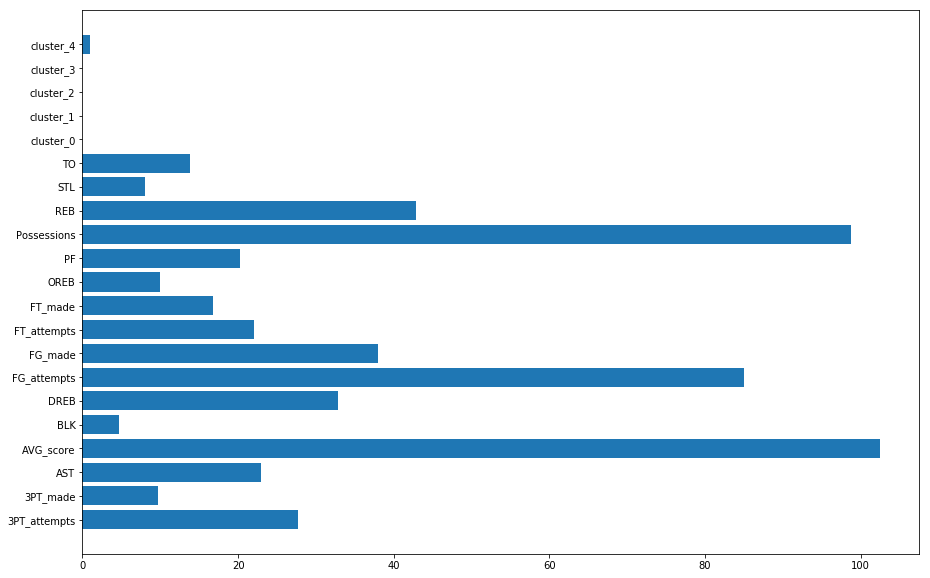

In [163]:
plt.figure(figsize=(15,10))
plt.barh(cluster_4_bar.index,cluster_4_bar[0])

<Container object of 21 artists>

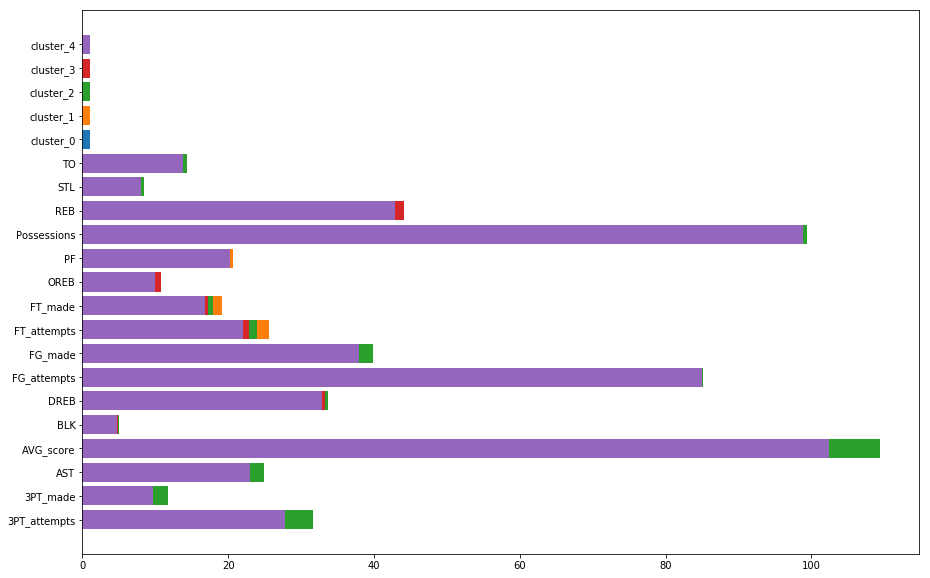

In [164]:
plt.figure(figsize=(15,10))
plt.barh(cluster_0_bar.index,cluster_0_bar[0])
plt.barh(cluster_1_bar.index,cluster_1_bar[0])
plt.barh(cluster_2_bar.index,cluster_2_bar[0])
plt.barh(cluster_3_bar.index,cluster_3_bar[0])
plt.barh(cluster_4_bar.index,cluster_4_bar[0])

In [165]:
c_0=pd.DataFrame(cluster_0.drop(['AVG_score','FG_attempts','Possessions','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'],axis=1).mean())

<Container object of 13 artists>

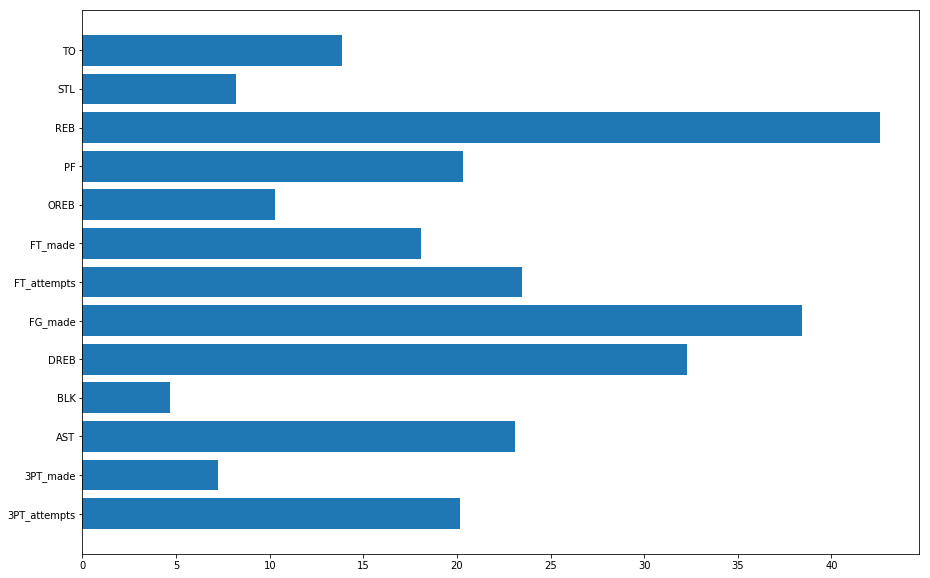

In [166]:
plt.figure(figsize=(15,10))
plt.barh(c_0.index,c_0[0])

<Container object of 13 artists>

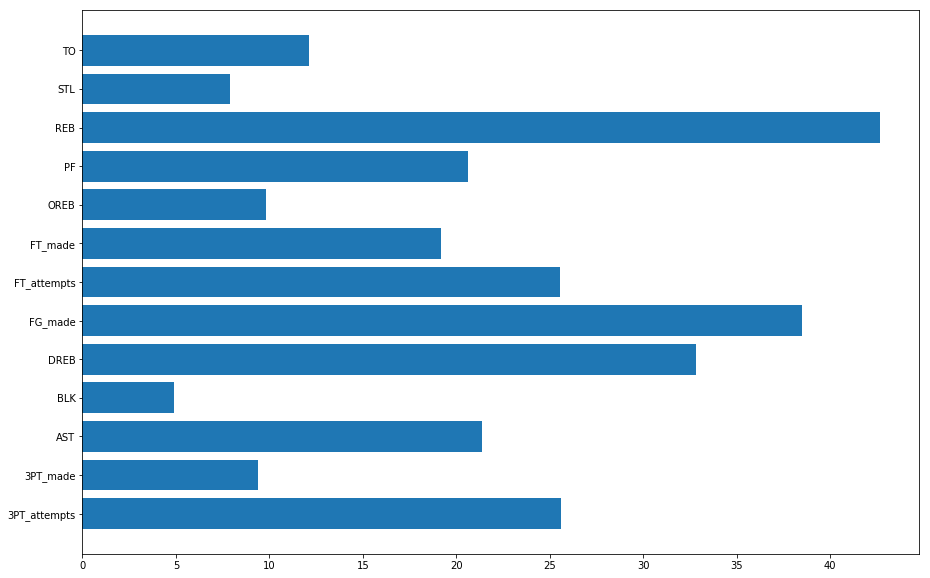

In [167]:
c_1=pd.DataFrame(cluster_1.drop(['AVG_score','FG_attempts','Possessions','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'],axis=1).mean())
plt.figure(figsize=(15,10))
plt.barh(c_1.index,c_1[0])

<Container object of 13 artists>

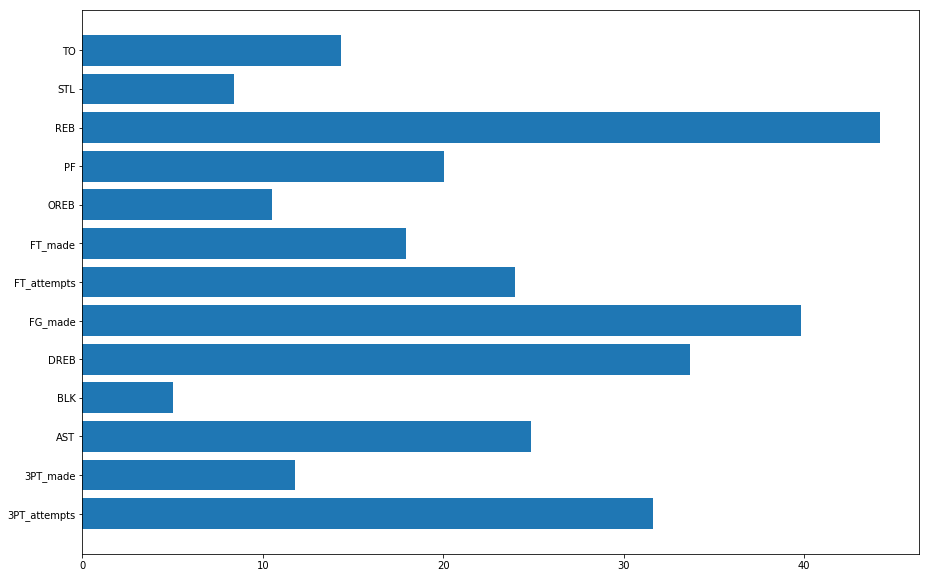

In [168]:
c_2=pd.DataFrame(cluster_2.drop(['Possessions','AVG_score','FG_attempts','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'],axis=1).mean())
plt.figure(figsize=(15,10))
plt.barh(c_2.index,c_2[0])

<Container object of 13 artists>

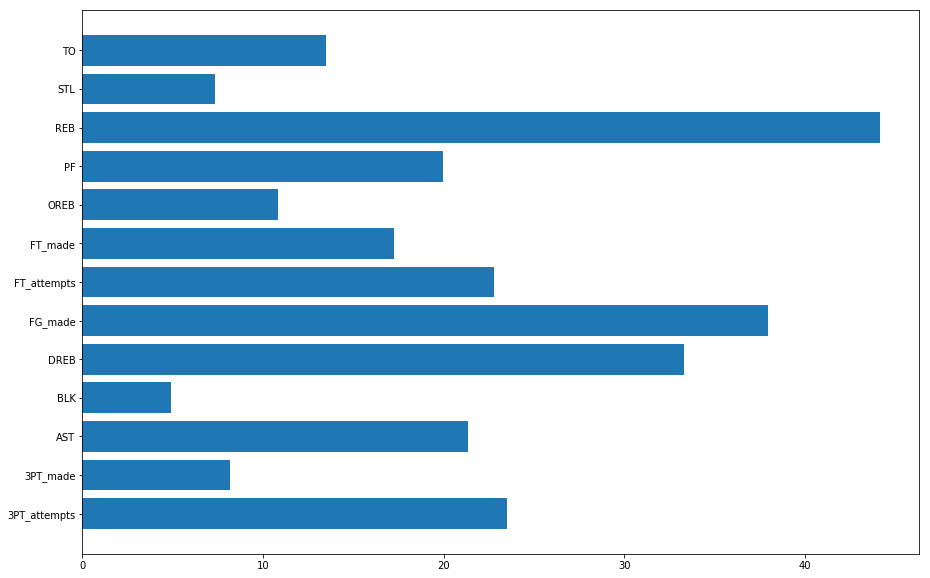

In [169]:
c_3=pd.DataFrame(cluster_3.drop(['Possessions','AVG_score','FG_attempts','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'],axis=1).mean())
plt.figure(figsize=(15,10))
plt.barh(c_3.index,c_3[0])

<Container object of 13 artists>

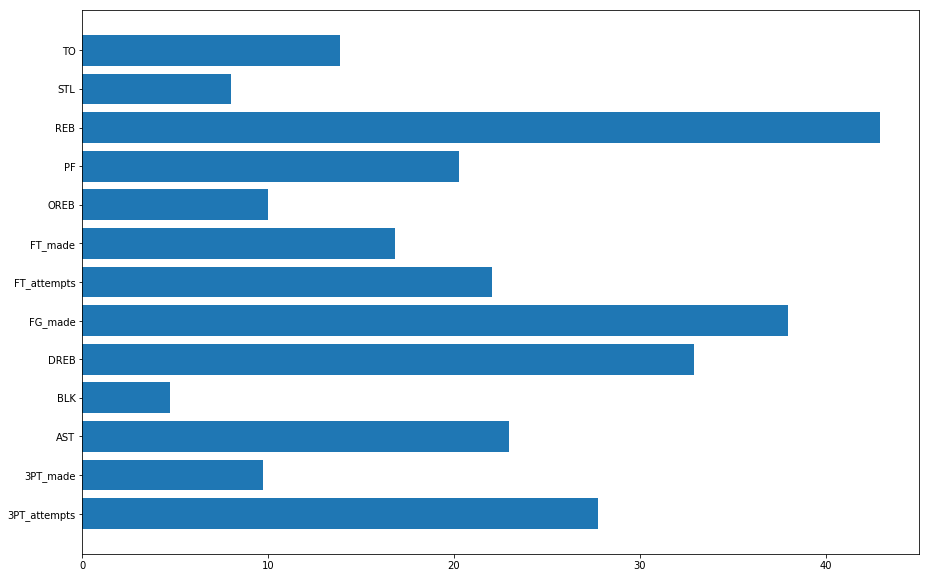

In [170]:
c_4=pd.DataFrame(cluster_4.drop(['Possessions','AVG_score','FG_attempts','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'],axis=1).mean())
plt.figure(figsize=(15,10))
plt.barh(c_4.index,c_4[0])

In [171]:
bar_width = 0.15
index = np.arange(len(c_4))

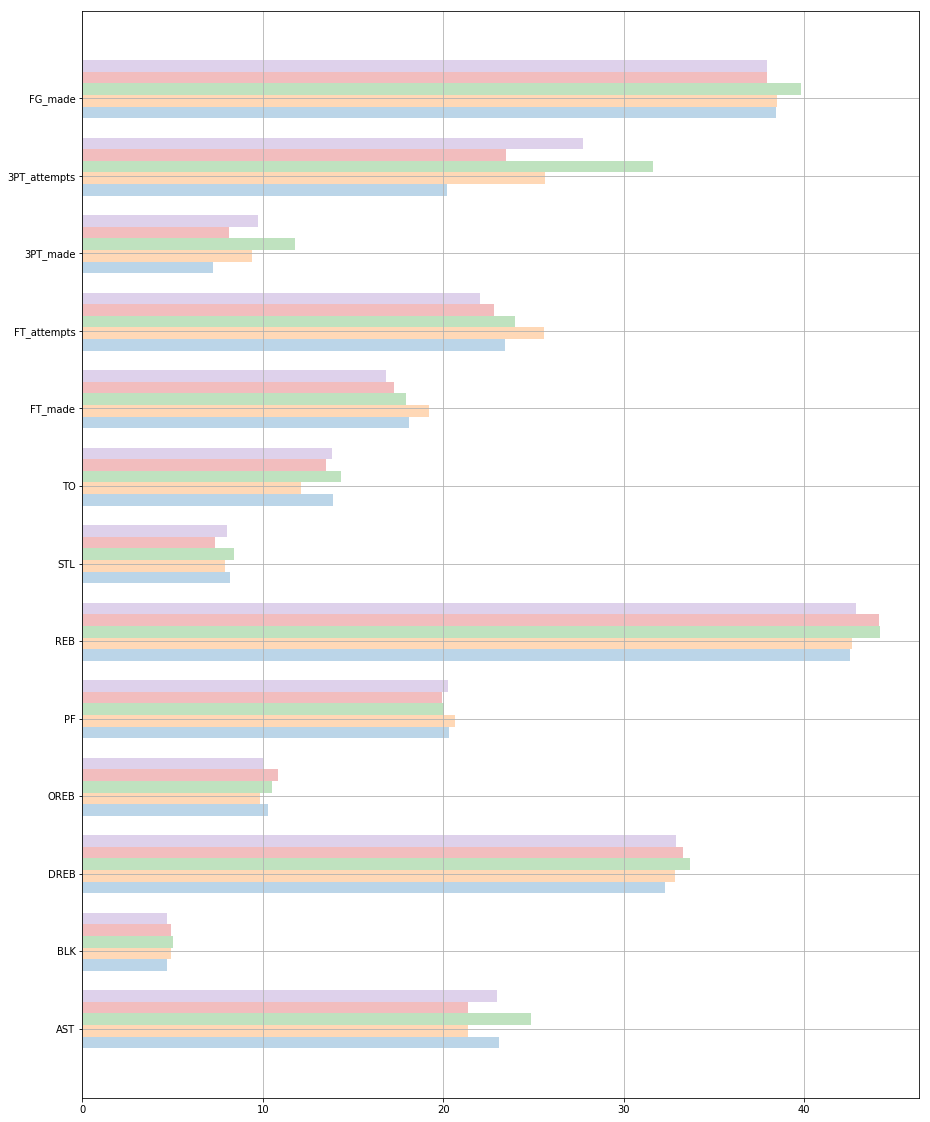

In [172]:
plt.figure(figsize=(15,20))
plt.barh(index-bar_width,c_0[0],bar_width,alpha=.3)
plt.barh(index,c_1[0],bar_width,alpha=.3)
plt.barh(index+bar_width,c_2[0],bar_width,alpha=.3)
plt.barh(index+2*bar_width,c_3[0],bar_width,alpha=.3)
plt.barh(index+3*bar_width,c_4[0],bar_width,alpha=.3)
plt.yticks(index + bar_width / 5, c_4.index)
plt.grid()

In [173]:
c_0=pd.DataFrame(cluster_0[['Possessions','AVG_score','FG_attempts']].mean())
c_1=pd.DataFrame(cluster_1[['Possessions','AVG_score','FG_attempts']].mean())
c_2=pd.DataFrame(cluster_2[['Possessions','AVG_score','FG_attempts']].mean())
c_3=pd.DataFrame(cluster_3[['Possessions','AVG_score','FG_attempts']].mean())
c_4=pd.DataFrame(cluster_4[['Possessions','AVG_score','FG_attempts']].mean())

In [174]:
bar_width = 0.15
index = np.arange(len(c_4))

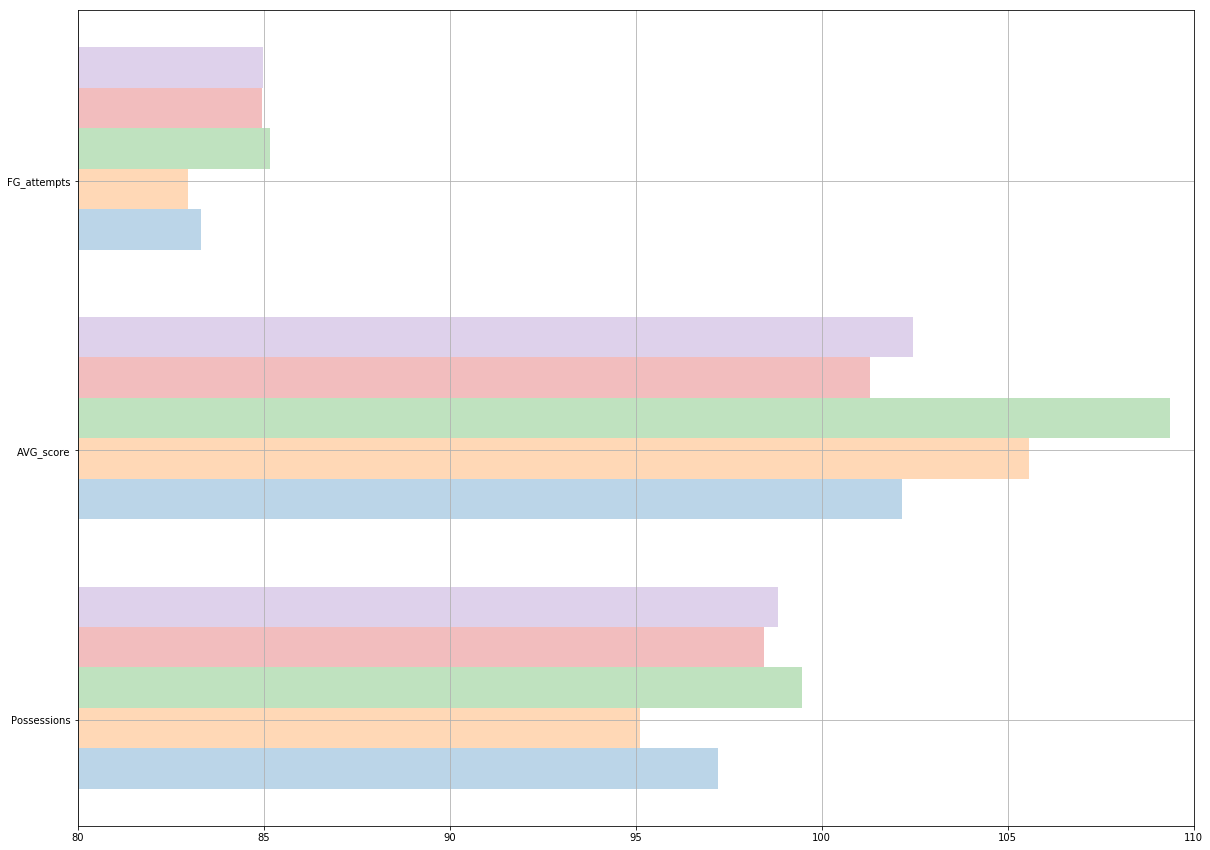

In [175]:
plt.figure(figsize=(20,15))
plt.barh(index-bar_width,c_0[0],bar_width,alpha=.3)
plt.barh(index,c_1[0],bar_width,alpha=.3)
plt.barh(index+bar_width,c_2[0],bar_width,alpha=.3)
plt.barh(index+2*bar_width,c_3[0],bar_width,alpha=.3)
plt.barh(index+3*bar_width,c_4[0],bar_width,alpha=.3)
plt.yticks(index + bar_width / 5, c_4.index)
plt.xlim((80,110))
plt.grid()

In [176]:
small_df=s2018[['game_id','team','home_team','Total_PTS']]

In [177]:
joined=small_df.join(comb_3,on='team')

In [178]:
joined_group = joined.groupby(['game_id','team']).mean()

In [179]:
joined_group

home_team  Total_PTS        AST       BLK       DREB  \
game_id   team                                                                  
400974437 Cavaliers           True        201  22.491870  4.008130  33.378049   
          Celtics            False        201  24.630081  3.991870  32.991870   
400974438 Rockets            False        243  23.215447  4.833333  32.402439   
          Warriors            True        243  28.910569  6.292683  35.199187   
400974439 76ers              False        235  21.939024  5.686992  31.894309   
          Wizards             True        235  24.105691  4.219512  33.170732   
400974440 Spurs               True        206  24.243902  5.743902  34.065041   
          Timberwolves       False        206  22.873984  4.357724  30.621951   
400974441 Knicks             False        189  21.195122  5.288618  32.329268   
          Thunder             True        189  21.483740  5.483740  34.882114   
400974442 Clippers           False        200  23.382114  4.947154  33.443089   
          Lakers              True        200  19.955285  4.158537  32.227642   
400974443 Bucks               True        213  23.621951  5.345528  31.390244   
          Cavaliers          False        213  22.491870  4.008130  33.378049   
400974444 Pelicans            True        248  22.329268  5.304878  33.382114   
          Warriors           False        248  28.910569  6.292683  35.199187   
400974445 76ers              False        203  21.939024  5.686992  31.894309   
          Knicks              True        203  21.195122  5.288618  32.329268   
400974446 Cavaliers          False        191  22.491870  4.008130  33.378049   
          Warriors            True        191  28.910569  6.292683  35.199187   
400974447 Celtics             True        214  24.630081  3.991870  32.991870   
          Wizards            False        214  24.105691  4.219512  33.170732   
400974448 Rockets            False        219  23.215447  4.833333  32.402439   
          Thunder             True        219  21.483740  5.483740  34.882114   
400974449 Lakers              True        225  19.955285  4.158537  32.227642   
          Timberwolves       False        225  22.873984  4.357724  30.621951   
400974700 Hornets            False        192  21.638211  5.186992  34.613821   
          Pistons             True        192  20.719512  4.052846  33.516260   
400974701 Nets               False        271  21.548780  4.308943  33.008130   
          Pacers              True        271  21.715447  4.784553  33.752033   
...                            ...        ...        ...       ...        ...   
400975963 Jazz                True        198  19.662602  5.382114  32.747967   
          Warriors           False        198  28.910569  6.292683  35.199187   
400975964 Lakers              True        204  19.955285  4.158537  32.227642   
          Rockets            False        204  23.215447  4.833333  32.402439   
400975965 Celtics             True        207  24.630081  3.991870  32.991870   
          Nets               False        207  21.548780  4.308943  33.008130   
400975966 Cavaliers           True        208  22.491870  4.008130  33.378049   
          Knicks             False        208  21.195122  5.288618  32.329268   
400975967 Heat                True        225  20.638211  5.589431  32.426829   
          Raptors            False        225  19.325203  4.902439  32.219512   
400975968 Magic               True        193  22.134146  4.581301  32.723577   
          Wizards            False        193  24.105691  4.219512  33.170732   
400975969 76ers               True        225  21.939024  5.686992  31.894309   
          Bucks              False        225  23.621951  5.345528  31.390244   
400975970 Bulls               True        206  22.365854  5.443089  34.463415   
          Pistons            False        206  20.719512  4.052846  33.516260   
400975971 Nuggets            False        218  23.264228

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a32e02c18>,
      dtype=object)

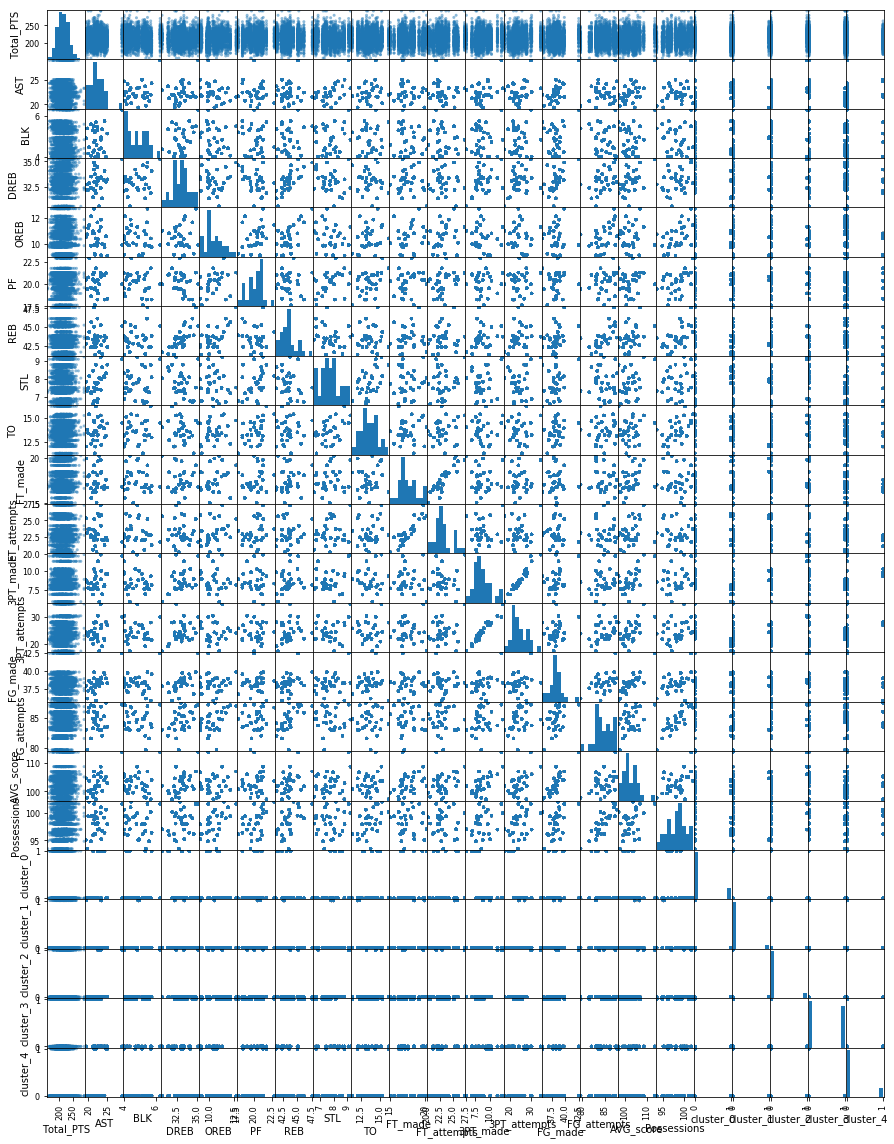

In [180]:
pd.scatter_matrix(joined_group.drop('home_team',axis=1),figsize=(15,20))

In [181]:
joined_group.drop('home_team',axis=1).corr()

,Total_PTS,AST,BLK,DREB,OREB,PF,REB,STL,TO,FT_made,...,3PT_attempts,FG_made,FG_attempts,AVG_score,Possessions,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
Total_PTS,1.000000,0.049170,0.026097,0.021951,0.007132,0.028742,0.020901,0.013958,0.036647,0.045800,...,0.077958,0.062105,0.077543,0.093297,0.083493,-0.089442,0.055004,0.112201,0.028449,-0.069220
AST,0.049170,1.000000,0.282127,0.324840,-0.321708,-0.090810,0.034484,0.539015,0.212054,-0.112213,...,0.281104,0.711839,0.250693,0.624519,0.317500,0.204780,-0.137439,0.455316,-0.485389,0.155446
BLK,0.026097,0.282127,1.000000,0.344734,-0.126337,-0.178904,0.174937,0.166382,0.152661,-0.139379,...,0.018212,0.148840,-0.172905,0.100325,-0.067028,-0.129359,0.039678,0.113894,0.083733,-0.091487
DREB,0.021951,0.324840,0.344734,1.000000,0.035502,-0.358905,0.766016,-0.256712,-0.132782,-0.104337,...,0.324600,0.556948,0.477449,0.518845,0.331882,-0.354643,-0.054461,0.199017,0.240683,-0.065303
OREB,0.007132,-0.321708,-0.126337,0.035502,1.000000,0.339632,0.669611,-0.175389,0.254367,0.274256,...,-0.036801,0.011330,0.446619,0.050749,0.502901,-0.122260,-0.197184,0.017603,0.360480,-0.233525
PF,0.028742,-0.090810,-0.178904,-0.358905,0.339632,1.000000,-0.048271,0.423438,0.537241,0.227344,...,0.051506,0.066492,0.195777,0.120566,0.436872,0.075346,0.115826,-0.019427,-0.141936,0.047247
REB,0.020901,0.034484,0.174937,0.766016,0.669611,-0.048271,1.000000,-0.303599,0.064935,0.098868,...,0.217565,0.421201,0.642108,0.418239,0.570128,-0.342204,-0.167309,0.159228,0.410742,-0.198741
STL,0.013958,0.539015,0.166382,-0.256712,-0.175389,0.423438,-0.303599,1.000000,0.505675,0.131946,...,0.213509,0.270887,-0.050063,0.333377,0.215182,0.302516,0.054245,0.301871,-0.574221,0.164681
TO,0.036647,0.212054,0.152661,-0.132782,0.254367,0.537241,0.064935,0.505675,1.000000,0.076972,...,0.088145,0.095769,0.049224,0.114121,0.549524,0.118882,-0.364213,0.206202,-0.103071,0.088168
FT_made,0.045800,-0.112213,-0.139379,-0.104337,0.274256,0.227344,0.098868,0.131946,0.076972,1.000000,...,-0.024161,-0.007431,-0.086836,0.349695,-0.033509,0.205147,0.345627,0.093150,-0.203362,-0.254277


In [ ]:
hawks_id = np.unique(joined['game_id'][joined['team']=='Hawks'])

In [ ]:
joined_game=joined.groupby(['game_id','team']).mean()

In [ ]:
inde=[joined_game.index[i][0] in list(hawks_id) for i in range(len(joined_game))]

In [ ]:
joined_game[inde]

In [186]:
grouped_games_score = s2018.groupby(['game_id','team'])
game_totals=pd.DataFrame(grouped_games_score.sum()['PTS'])

In [187]:
game_totals

PTS
game_id   team              
400974437 Cavaliers      102
          Celtics         99
400974438 Rockets        122
          Warriors       121
400974439 76ers          115
          Wizards        120
400974440 Spurs          107
          Timberwolves    99
400974441 Knicks          84
          Thunder        105
400974442 Clippers       108
          Lakers          92
400974443 Bucks           97
          Cavaliers      116
400974444 Pelicans       120
          Warriors       128
400974445 76ers          105
          Knicks          98
400974446 Cavaliers       92
          Warriors        99
400974447 Celtics        103
          Wizards        111
400974448 Rockets        107
          Thunder        112
400974449 Lakers         104
          Timberwolves   121
400974700 Hornets         90
          Pistons        102
400974701 Nets           131
          Pacers         140
...                      ...
400975963 Jazz           119
          Warriors        79
400975964 Lakers          99
          Rockets        105
400975965 Celtics        110
          Nets            97
400975966 Cavaliers       98
          Knicks         110
400975967 Heat           116
          Raptors        109
400975968 Magic          101
          Wizards         92
400975969 76ers          130
          Bucks           95
400975970 Bulls           87
          Pistons        119
400975971 Nuggets        106
          Timberwolves   112
400975972 Pelicans       122
          Spurs           98
400975973 Grizzlies      123
          Thunder        137
400975974 Clippers       100
          Lakers         115
400975975 Jazz            93
          Trail Blazers  102
400975976 Kings           96
          Rockets         83
401019650 Pacers          92
          Pelicans        96

[2460 rows x 1 columns]

In [108]:
s2018['game_id']

0        400974705
1        400974705
2        400974705
3        400974705
4        400974705
5        400974705
6        400974705
7        400974705
8        400974705
9        400974705
10       400974705
11       400974705
12       400974705
13       400974705
14       400974705
15       400974705
16       400974705
17       400974705
18       400974705
19       400974705
20       400974705
21       400974705
22       400974705
23       400974705
24       400974705
25       400974705
26       400974770
27       400974770
28       400974770
29       400974770
           ...    
30960    400975100
30961    400975100
30962    400975100
30963    400975100
30964    400975351
30965    400975351
30966    400975351
30967    400975351
30968    400975351
30969    400975351
30970    400975351
30971    400975351
30972    400975351
30973    400975351
30974    400975351
30975    400975351
30976    400975351
30977    400975351
30978    400975351
30979    400975351
30980    400975351
30981    400

In [191]:
hawks_id

array([400974705, 400974770, 400974789, 400974793, 400974816, 400974823,
       400974836, 400974858, 400974874, 400974887, 400974897, 400974920,
       400974928, 400974946, 400974955, 400974981, 400975001, 400975007,
       400975019, 400975031, 400975064, 400975079, 400975093, 400975106,
       400975129, 400975141, 400975148, 400975164, 400975176, 400975194,
       400975206, 400975228, 400975235, 400975254, 400975268, 400975279,
       400975297, 400975322, 400975336, 400975344, 400975358, 400975367,
       400975387, 400975400, 400975421, 400975434, 400975451, 400975460,
       400975472, 400975485, 400975501, 400975513, 400975532, 400975545,
       400975557, 400975565, 400975580, 400975594, 400975599, 400975620,
       400975643, 400975661, 400975674, 400975689, 400975704, 400975724,
       400975739, 400975753, 400975767, 400975787, 400975808, 400975823,
       400975833, 400975847, 400975866, 400975876, 400975893, 400975904,
       400975918, 400975930, 400975948, 400975960])

In [1]:
hawks['days_after_opener']-hawks['days_after_opener'].min()


NameError: name 'hawks' is not defined

In [129]:
s2018 = pd.read_csv('data/2018.csv')

In [130]:
s2018 = c.all_clean(s2018)

In [131]:
s_2018_sorted = s2018.sort_index(axis=0,by='days_after_opener')

In [132]:
hawks=s_2018_sorted[s_2018_sorted['team']=='Hawks']

In [133]:
hawks['days_after_opener']

0        1 days
12       1 days
11       1 days
10       1 days
9        1 days
8        1 days
7        1 days
6        1 days
4        1 days
1        1 days
2        1 days
5        1 days
3        1 days
38       3 days
37       3 days
36       3 days
35       3 days
34       3 days
33       3 days
32       3 days
31       3 days
30       3 days
29       3 days
28       3 days
27       3 days
26       3 days
55       5 days
64       5 days
63       5 days
62       5 days
         ...   
2004   171 days
2002   171 days
2001   171 days
2003   171 days
2030   173 days
2029   173 days
2028   173 days
2027   173 days
2026   173 days
2025   173 days
2024   173 days
2031   173 days
2033   173 days
2032   173 days
2036   173 days
2035   173 days
2034   173 days
2065   175 days
2062   175 days
2063   175 days
2064   175 days
2066   175 days
2067   175 days
2068   175 days
2069   175 days
2070   175 days
2071   175 days
2072   175 days
2073   175 days
2074   175 days
Name: days_after_opener,

In [134]:
group_hawks=hawks.groupby('days_after_opener').mean()

In [135]:
group_hawks

,+/-,AST,BLK,DREB,Min,OREB,PF,PTS,REB,STL,...,game_id,starter,home_team,FT_made,FT_attempts,3PT_made,3PT_attempts,FG_made,FG_attempts,Total_PTS
days_after_opener,,,,,,,,,,,,,,,,,,,,,
1 days,2.307692,1.538462,0.461538,2.769231,18.538462,1.076923,1.384615,9.000000,3.846154,0.846154,...,400974705.0,0.384615,False,0.923077,1.153846,0.692308,1.384615,3.692308,7.230769,228.0
3 days,-6.923077,1.461538,0.307692,2.461538,18.538462,0.461538,2.230769,7.000000,2.923077,0.846154,...,400974770.0,0.384615,False,0.923077,1.076923,0.538462,2.307692,2.769231,7.307692,200.0
5 days,-4.615385,1.615385,0.153846,2.461538,18.384615,1.230769,1.923077,8.000000,3.692308,0.461538,...,400974789.0,0.384615,False,2.538462,2.769231,0.538462,2.076923,2.461538,7.230769,220.0
6 days,-4.230769,1.076923,0.076923,2.692308,18.461538,0.461538,1.307692,7.153846,3.153846,0.692308,...,400974793.0,0.384615,False,1.076923,1.384615,0.538462,1.307692,2.769231,5.846154,197.0
9 days,-1.923077,1.692308,0.384615,2.538462,18.461538,0.538462,1.769231,6.615385,3.076923,0.769231,...,400974816.0,0.384615,False,0.846154,1.000000,0.846154,2.153846,2.461538,6.230769,177.0
10 days,-1.923077,1.769231,0.307692,2.461538,18.538462,0.846154,1.615385,7.692308,3.307692,0.538462,...,400974823.0,0.384615,True,0.923077,0.923077,1.076923,2.538462,2.846154,6.846154,205.0
12 days,-4.230769,2.076923,0.153846,2.153846,18.384615,0.230769,1.615385,8.153846,2.384615,0.692308,...,400974836.0,0.384615,True,1.615385,2.000000,1.000000,2.230769,2.769231,5.923077,223.0
15 days,-4.166667,1.833333,0.333333,3.083333,20.083333,1.000000,2.333333,9.083333,4.083333,0.916667,...,400974858.0,0.416667,False,1.583333,2.250000,0.666667,1.916667,3.416667,7.833333,228.0
17 days,-6.250000,1.333333,0.666667,3.000000,20.000000,0.416667,1.333333,8.666667,3.416667,0.666667,...,400974874.0,0.416667,True,1.250000,1.500000,0.916667,2.750000,3.250000,6.750000,223.0


In [146]:
teams = np.unique(s2018['team'])

In [147]:
teams

array(['76ers', 'Bucks', 'Bulls', 'Cavaliers', 'Celtics', 'Clippers',
       'Grizzlies', 'Hawks', 'Heat', 'Hornets', 'Jazz', 'Kings', 'Knicks',
       'Lakers', 'Magic', 'Mavericks', 'Nets', 'Nuggets', 'Pacers',
       'Pelicans', 'Pistons', 'Raptors', 'Rockets', 'Spurs', 'Suns',
       'Thunder', 'Timberwolves', 'Trail Blazers', 'Warriors', 'Wizards'],
      dtype=object)

In [140]:

ls = np.zeros((82,2))
prev_ind=None
i = 0
for team in teams:
for ind,game_id in zip(group_hawks.index,group_hawks['game_id']):
    try:
        ls[i][0] = int((ind - prev_ind).days)
        ls[i][1] = int(game_id)
    except:
        ls[i][0]=0
        ls[i][1]=int(game_id)
    prev_ind = ind
    i+=1

In [141]:
rest = pd.DataFrame(ls,columns=['rest','game_id']).astype(int)

In [142]:
rest['team']='Hawks'

In [143]:
rest

,rest,game_id,team
0,0,400974705,Hawks
1,2,400974770,Hawks
2,2,400974789,Hawks
3,1,400974793,Hawks
4,3,400974816,Hawks
5,1,400974823,Hawks
6,2,400974836,Hawks
7,3,400974858,Hawks
8,2,400974874,Hawks
9,2,400974887,Hawks
